In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("co2 _capture_data.csv")

In [3]:

df

,S.No.,T,pCO2,m,C,loading,Unnamed: 6,Unnamed: 7
0,1,313.15,20.27,0.05,1.0,0.7679,NaN,NaN
1,2,313.15,20.27,0.10,1.0,0.7966,NaN,NaN
2,3,313.15,20.27,0.15,1.0,0.8337,NaN,NaN
3,4,305.15,20.27,0.20,1.0,0.8932,NaN,NaN
4,5,313.15,20.27,0.20,1.0,0.8597,NaN,NaN
...,...,...,...,...,...,...,...,...
264,265,313.15,25.33,0.10,3.0,0.6970,NaN,NaN
265,266,313.15,25.33,0.15,3.0,0.7169,NaN,NaN
266,267,313.15,25.33,0.20,3.0,0.7417,NaN,NaN
267,268,323.15,20.27,0.20,3.0,0.6439,NaN,NaN


In [4]:
df = df.iloc[:, :-2]

In [5]:
df

,S.No.,T,pCO2,m,C,loading
0,1,313.15,20.27,0.05,1.0,0.7679
1,2,313.15,20.27,0.10,1.0,0.7966
2,3,313.15,20.27,0.15,1.0,0.8337
3,4,305.15,20.27,0.20,1.0,0.8932
4,5,313.15,20.27,0.20,1.0,0.8597
...,...,...,...,...,...,...
264,265,313.15,25.33,0.10,3.0,0.6970
265,266,313.15,25.33,0.15,3.0,0.7169
266,267,313.15,25.33,0.20,3.0,0.7417
267,268,323.15,20.27,0.20,3.0,0.6439


In [6]:
print("Data shape:", df.shape)

Data shape: (269, 6)


In [7]:
print(df.head())

   S.No.       T   pCO2     m    C  loading
0      1  313.15  20.27  0.05  1.0   0.7679
1      2  313.15  20.27  0.10  1.0   0.7966
2      3  313.15  20.27  0.15  1.0   0.8337
3      4  305.15  20.27  0.20  1.0   0.8932
4      5  313.15  20.27  0.20  1.0   0.8597


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S.No.    269 non-null    int64  
 1   T        269 non-null    float64
 2   pCO2     269 non-null    float64
 3   m        269 non-null    float64
 4   C        269 non-null    float64
 5   loading  269 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 12.7 KB
None


In [9]:
print(df.describe())

            S.No.           T        pCO2           m           C     loading
count  269.000000  269.000000  269.000000  269.000000  269.000000  269.000000
mean   135.000000  312.042193   18.301264    0.175167    1.996283    0.828976
std     77.797815    7.899526    4.699391    0.055041    0.720169    0.134265
min      1.000000  293.150000    7.090000    0.050000    1.000000    0.512300
25%     68.000000  306.900000   14.690000    0.140000    1.500000    0.735600
50%    135.000000  313.150000   20.270000    0.200000    2.000000    0.835600
75%    202.000000  313.150000   20.270000    0.200000    2.500000    0.909120
max    269.000000  333.150000   25.330000    0.250000    3.000000    1.217400


In [10]:
X = df[['T', 'pCO2', 'm', 'C']]
y = df['loading']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
rf = RandomForestRegressor(random_state=42)

In [14]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [15]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='r2',
                           verbose=1)

In [16]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=1)

In [17]:
best_rf = grid_search.best_estimator_

In [18]:
y_pred = best_rf.predict(X_test)

In [19]:
print("Best Parameters:", grid_search.best_params_)
print("Optimized R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Optimized R2 Score: 0.6383533079603931
MSE: 0.008184460012060194


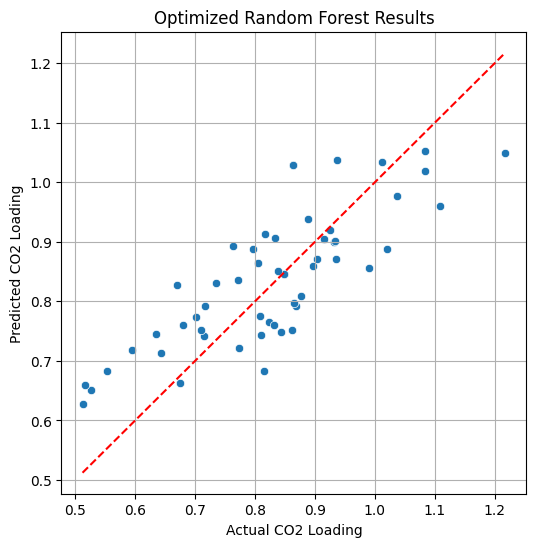

In [20]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual CO2 Loading")
plt.ylabel("Predicted CO2 Loading")
plt.title("Optimized Random Forest Results")
plt.grid(True)
plt.show()